In [1]:
source('modules/generate_data.r')

In [2]:
range = 8
n <- n_amostra <- 800
sgnf <- .05
p = c(.80,.85,.90,.95,1)

params = list(zeta0 = 11,
                zeta = 25,
                betas = c(-21,-4))
disturbs = list(mean = 0,
                  sd = sqrt(11))


y_lim = c(0,100)
x_lim = c(0,14)


In [3]:
errors_mc = generate_errors(n = n_amostra,disturbs = disturbs)
df = get_data(p=p[1],n = n_amostra,errors = errors_mc) 

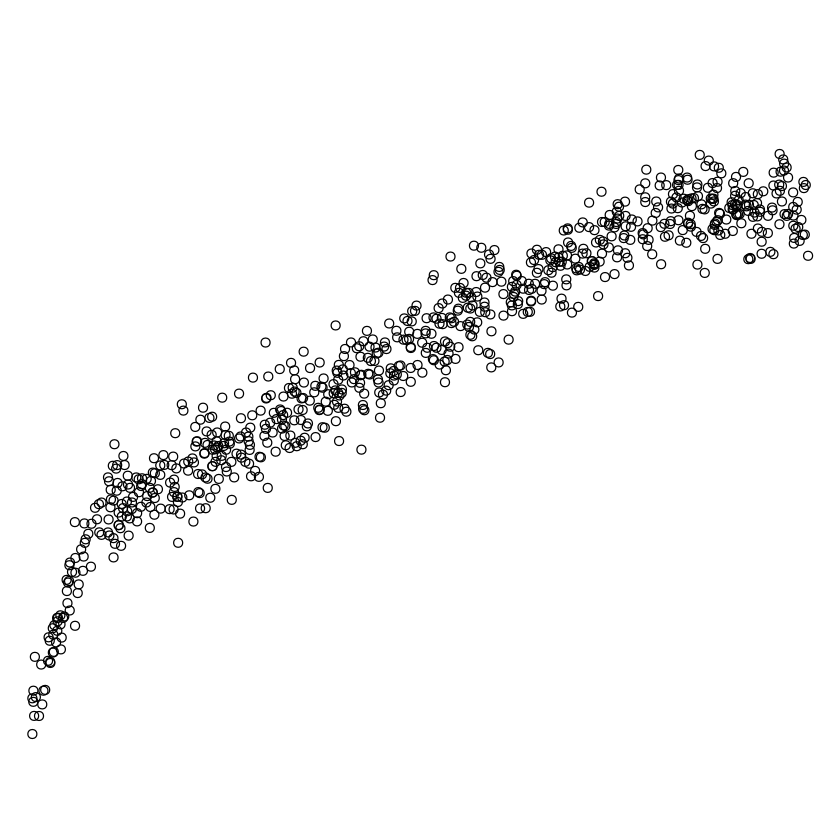

In [4]:
par(mar=c(0,0,0,0))
plot(df[,c(1,2)],ylab="",xlab="", yaxt = "n",xaxt = "n",xlim = x_lim,ylim = y_lim,frame.plot=FALSE)

In [6]:
naming_file <- function(j,i){
    return(paste("images/im_",sub('\\.','_',as.character(j)),"_",i,".png",sep = ''))
}

write_plot <- function(df,i,j){
    y_lim = c(0,runif(1,90,130))
    png(file = naming_file(j,i),width = 360, height = 360)

    par(mar=c(0,0,0,0))
    plot(df[,c(1,2)],ylab="",xlab="", yaxt = "n",xaxt = "n",xlim = x_lim,ylim = y_lim,frame.plot=FALSE)

    dev.off()
}

generate_df <- function(p,n_amostra=800){
    errors_mc = generate_errors(n = n_amostra,disturbs = disturbs)
    df = get_data(p=p,n = n_amostra,errors = errors_mc) 
    return(df)
}

In [7]:
for(j in p){
for(i in 1:1500){
    df = generate_df(j,sample(500:800,1))
    write_plot(df,i,j)
}
print(j)
}

[1] 0.8
[1] 0.85
[1] 0.9
[1] 0.95
[1] 1


----
## com zeros antes

In [8]:
naming_file <- function(j,i,ruidos){
    return(paste(ruidos,"/imr_",sub('\\.','_',as.character(j)),"_",i,".png",sep = ''))
}

write_plot <- function(df,i,j,ruidos,new_min){
    png(file = naming_file(j,i,ruidos))
    ruidos = 'ruidos'
    par(mar=c(0,0,0,0))
    y_lim = c(0,100)
    x_lim = c(new_min,14)
    plot(df,ylab="",xlab="", yaxt = "n",xaxt = "n",xlim = x_lim,ylim = y_lim,frame.plot=FALSE)
    dev.off()
}

generate_df <- function(pp){
    errors_mc = generate_errors(n = n_amostra,disturbs = disturbs)
    df = get_data(p=pp,n = n_amostra,errors = errors_mc) 
    return(df)
}

generate_ruido <- function(j){
    df = generate_df(j)
    start_size = sample(1:350,1)
    
    new_min = -(14*(start_size/800))
    x_ruido = runif(n = start_size,max = 0,min=new_min)
    y = rep(0,start_size)

    zero_df = data.frame(cbind(x_ruido,y))
    
    colnames(zero_df) <- colnames(df)[c(1,2)]
    new_zero_df = rbind(zero_df, df[-sample(x = 1:600,start_size),c(1,2)])
    return(new_zero_df)
}

In [9]:
p[c(1,2,5)]

[1] 0.80 0.85 1.00

In [10]:
for(j in p[c(1,2,5)]){
for(i in 1:400){
    df = generate_ruido(j)
    write_plot(df,i,j,'ruidos',new_min=min(df$x))
}
print(j)
}

[1] 0.8
[1] 0.85
[1] 1


In [170]:
p

[1] 0.80 0.85 0.90 0.95 1.00